<a href="https://colab.research.google.com/github/aliostadi/Apple-Stock-Price-Prediction/blob/main/final_project_bachelor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 - Data Preprocessing for NN Models

### Importing the libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from keras.utils.vis_utils import plot_model
! pip install pmdarima
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 46.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the training set

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

#
dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/proje payani/HistoricalQuotes.xlsx', )
dataset.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-12-31,132.69,99116590,134.08,134.740,131.7200
1,2020-12-30,133.72,96452120,135.58,135.990,133.4000
2,2020-12-29,134.87,121047300,138.05,138.789,134.3409
3,2020-12-28,136.69,124486200,133.99,137.340,133.5100
4,2020-12-24,131.97,54930060,131.32,133.460,131.1000


In [9]:
#reverse data
def reset_my_index(df):
  res = df[::-1].reset_index(drop=True)
  return(res)


In [10]:
dataset=reset_my_index(dataset)

dataset

,Date,Close/Last,Volume,Open,High,Low
0,2011-01-03,11.7704,443858622,11.6300,11.7950,11.6013
1,2011-01-04,11.8318,308848276,11.8729,11.8750,11.7196
2,2011-01-05,11.9286,253240859,11.7696,11.9407,11.7679
3,2011-01-06,11.9189,299831440,11.9543,11.9732,11.8893
4,2011-01-07,12.0043,309486396,11.9282,12.0125,11.8536
...,...,...,...,...,...,...
2512,2020-12-24,131.9700,54930060,131.3200,133.4600,131.1000
2513,2020-12-28,136.6900,124486200,133.9900,137.3400,133.5100
2514,2020-12-29,134.8700,121047300,138.0500,138.7890,134.3409
2515,2020-12-30,133.7200,96452120,135.5800,135.9900,133.4000


In [11]:
dataset=dataset.iloc[:,3]
dataset.shape


(2517,)

In [12]:
dataset

0        11.6300
1        11.8729
2        11.7696
3        11.9543
4        11.9282
          ...   
2512    131.3200
2513    133.9900
2514    138.0500
2515    135.5800
2516    134.0800
Name:  Open, Length: 2517, dtype: float64

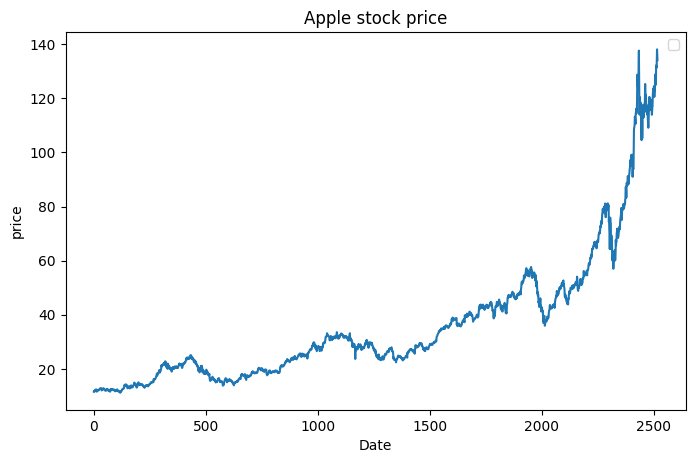

In [13]:

plt.figure(figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Apple stock price')
plt.legend()
dataset.plot()


##Split Data 

In [14]:
training_set=dataset.iloc[:-60]
test_set=dataset.iloc[len(training_set):]
print(training_set.shape)
print(test_set.shape)
#60 2mah akhar test

(2457,)
(60,)


In [15]:
dataset=np.array(dataset)
dataset=dataset.reshape(-1,1)

In [16]:

dataset_scaled=dataset

In [17]:

print(dataset_scaled.shape)

(2517, 1)


In [18]:
dataset_scaled

array([[ 11.63  ],
       [ 11.8729],
       [ 11.7696],
       ...,
       [138.05  ],
       [135.58  ],
       [134.08  ]])

### Creating a data structure with windows size timesteps and 





In [19]:
windows_size=14
X=[]
y=[]
for i in range(windows_size,len(dataset_scaled)): #har nemoone ba tavajoh be 14 nemoome ye ghabli predict shavad 
  X.append(dataset_scaled[i-windows_size:i,0])  ## 14 ta nemoone dar har gam zamani
  y.append(dataset_scaled[i,0]) ##0 yani sotoon aval , python az 0 shomaregozari miknd na az 1
X,y=np.array(X),np.array(y)  ## dar ebteda X_train , y_train ra listi az adad gharar dadim vali voroodi model dar keras bayad be soorat array bashad

In [20]:
print(X.shape)
print(y.shape)
y

(2503, 14)
(2503,)


array([ 11.6739,  12.0118,  12.2486, ..., 138.05  , 135.58  , 134.08  ])

In [21]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

### Split Data to Train and Test 

In [22]:
X_train=X.iloc[:-60]
y_train=y.iloc[:-60]
X_test=X.iloc[len(X_train):]
y_test=y.iloc[len(y_train):]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(2443, 14) (60, 14) (2443, 1) (60, 1)


In [23]:
y_train

,0
0,11.6739
1,12.0118
2,12.2486
3,12.2779
4,12.2918
...,...
2438,113.7900
2439,117.6400
2440,112.8900
2441,113.9100


In [24]:
y_train

,0
0,11.6739
1,12.0118
2,12.2486
3,12.2779
4,12.2918
...,...
2438,113.7900
2439,117.6400
2440,112.8900
2441,113.9100


In [25]:
X_train,y_train=np.array(X_train),np.array(y_train)
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], 1)) ##tensor ya array vared shavande be laye haye RNN bayad se body bashad
#bode aval:teded kole gam haye zamani dar X_train 
## bode dovom :timesteps(tedad nemmone ha dar har game zamani)
##bode sevom: tedad feature ha ya indicator haee ke dar predict naghsh darand (dar in ja faghat openprice roo dar nazar gereftim 

X_train.shape

(2443, 14, 1)

In [26]:
X_test,y_test=np.array(X_test),np.array(y_test)
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], 1))


In [27]:
X_test.shape

(60, 14, 1)

## Part 2 - Building and Training the LSTM

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
from keras.layers import SimpleRNN

### Importing the Keras libraries and packages

### Initialising the RNN

In [30]:
import tensorflow as tf


In [43]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [120]:
regressor=Sequential()

### Adding  LSTM layers and some Dropout regularisation

In [121]:
regressor.add(LSTM(units = 220,activation='relu' ,return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))
# return_sequence = Treue : vaghti ke bad az in laye bazam laye LSTM dashte bashim
#dar input_shape be tor pishfaz bode aval ro midone faghat do bod diga ro vared mikonim  

In [122]:
regressor.add(LSTM(units = 330, return_sequences = True,activation='relu'))
#regressor.add(Dropout(0.2)) #faghat dar laye aval input_shape mikhad 

In [123]:
regressor.add(LSTM(units = 250, return_sequences = True,activation='relu'))
#regressor.add(Dropout(0.2))

In [124]:
regressor.add(LSTM(units = 160, return_sequences =False,activation='relu'))  # daigar laye LSTM nadarim badesh
#regressor.add(Dropout(0.2))    

### Adding the output layer

In [125]:
regressor.add(Dense(units=1,activation='selu'))

### Compiling the LSTM

In [126]:
regressor.compile(optimizer='adam',loss='mean_squared_error') #regression = mean sqared error 


In [127]:
y_train

array([[ 11.6739],
       [ 12.0118],
       [ 12.2486],
       ...,
       [112.89  ],
       [113.91  ],
       [115.7   ]])

### Fitting the LSTM to the Training set

In [128]:
regressor.fit(X_train,y_train,epochs=60,batch_size=32 , validation_data=[X_test , y_test],callbacks=[callback])

Epoch 1/60
77/77 [==============================] - 28s 291ms/step - loss: 142.5348 - val_loss: 41.1116
Epoch 2/60
77/77 [==============================] - 21s 267ms/step - loss: 15.8597 - val_loss: 77.3662
Epoch 3/60
77/77 [==============================] - 21s 269ms/step - loss: 8.5371 - val_loss: 29.2292
Epoch 4/60
77/77 [==============================] - 21s 279ms/step - loss: 9.7231 - val_loss: 36.7178
Epoch 5/60
77/77 [==============================] - 23s 302ms/step - loss: 7.9909 - val_loss: 34.9048
Epoch 6/60
77/77 [==============================] - 21s 275ms/step - loss: 7.6492 - val_loss: 54.9555
Epoch 7/60
77/77 [==============================] - 22s 281ms/step - loss: 5.4580 - val_loss: 46.1219
Epoch 8/60
77/77 [==============================] - 22s 282ms/step - loss: 9.8304 - val_loss: 16.6996
Epoch 9/60
77/77 [==============================] - 22s 281ms/step - loss: 5.2648 - val_loss: 12.5049
Epoch 10/60
77/77 [==============================] - 22s 287ms/step - loss: 5.5

### Making the predictions and visualising the results

In [129]:
# real_stock_price=sc_y.inverse_transform(y_test)

In [130]:
predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = sc_y.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 75ms/step


### Visualising the results

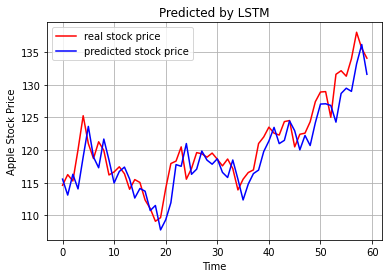

In [131]:
plt.plot(y_test, color = 'r', label = 'real stock price')
plt.plot(predicted_stock_price, color = 'b', label = 'predicted stock price')
plt.title('Predicted by LSTM')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

77/77 [==============================] - 6s 76ms/step


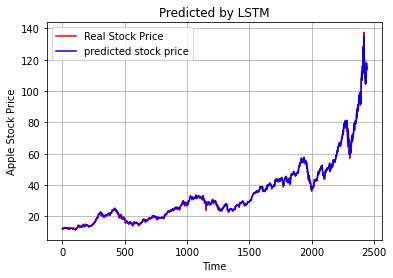

In [132]:
plt.plot(y_train, color = 'red', label = 'Real Stock Price')
plt.plot(regressor.predict(X_train), color = 'b', label = 'predicted stock price')
plt.title('Predicted by LSTM')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

###Evaluate the result

In [133]:

from math import sqrt
from sklearn.metrics import mean_squared_error
for i in range(len(predicted_stock_price)):
	print('predicted=%f, expected=%f' % (predicted_stock_price[i], y_test[i]))
rmseLSTM= sqrt(mean_squared_error(y_test, predicted_stock_price))
print('Test RMSE: %.3f' % rmseLSTM)

predicted=115.561935, expected=114.620000
predicted=113.119698, expected=116.250000
predicted=116.307556, expected=115.280000
predicted=114.063797, expected=120.060000
predicted=118.958313, expected=125.270000
predicted=123.634186, expected=121.000000
predicted=118.941231, expected=118.720000
predicted=117.301720, expected=121.280000
predicted=121.696846, expected=119.960000
predicted=118.487228, expected=116.200000
predicted=114.966423, expected=116.670000
predicted=116.730606, expected=117.450000
predicted=117.404953, expected=116.390000
predicted=115.577049, expected=114.010000
predicted=112.667503, expected=115.490000
predicted=114.127365, expected=115.050000
predicted=113.714256, expected=112.370000
predicted=110.749893, expected=111.060000
predicted=111.528297, expected=109.110000
predicted=107.785797, expected=109.660000
predicted=109.339279, expected=114.140000
predicted=111.948990, expected=117.950000
predicted=117.784988, expected=118.320000
predicted=117.525215, expected=120

#Part3-Building and Training the GRU

In [67]:
regressorGRU=Sequential()
regressorGRU.add(GRU(units = 200,activation='relu' ,return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorGRU.add(GRU(units = 150,activation='relu' ,return_sequences = True))
regressorGRU.add(GRU(units = 210,activation='relu' ,return_sequences = True))
regressorGRU.add(GRU(units = 220,activation='relu' ,return_sequences = False))
regressorGRU.add(Dense(units = 1,activation='selu' ))

In [68]:
regressorGRU.compile(optimizer='adam',loss='mean_squared_error' ) #regression = mean sqared error 


In [69]:
regressorGRU.fit(X_train,y_train,epochs=100,batch_size=32, validation_data=[X_test , y_test],callbacks=[callback])

Epoch 1/100
77/77 [==============================] - 30s 261ms/step - loss: 143.2783 - val_loss: 10.3676
Epoch 2/100
77/77 [==============================] - 12s 161ms/step - loss: 2.1145 - val_loss: 13.0794
Epoch 3/100
77/77 [==============================] - 12s 161ms/step - loss: 1.6005 - val_loss: 8.2970
Epoch 4/100
77/77 [==============================] - 12s 158ms/step - loss: 2.0935 - val_loss: 59.8268
Epoch 5/100
77/77 [==============================] - 12s 156ms/step - loss: 1.9926 - val_loss: 8.9048
Epoch 6/100
77/77 [==============================] - 12s 158ms/step - loss: 2.1187 - val_loss: 22.7108
Epoch 7/100
77/77 [==============================] - 13s 164ms/step - loss: 2.1198 - val_loss: 18.1806
Epoch 8/100
77/77 [==============================] - 13s 169ms/step - loss: 2.1427 - val_loss: 7.6994
Epoch 9/100
77/77 [==============================] - 12s 161ms/step - loss: 1.7398 - val_loss: 8.1459
Epoch 10/100
77/77 [==============================] - 12s 159ms/step - loss

In [70]:
predicted_stock_priceGRU = regressorGRU.predict(X_test)
# predicted_stock_priceGRU = sc.inverse_transform(predicted_stock_priceGRU)

2/2 [==============================] - 1s 43ms/step


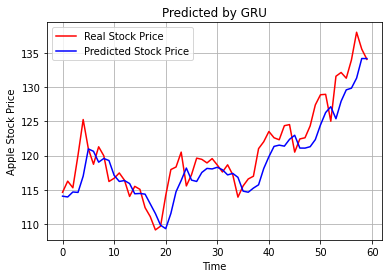

In [71]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_priceGRU, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predicted by GRU')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [72]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in range(len(predicted_stock_priceGRU)):
	print('predicted=%f, expected=%f' % (predicted_stock_priceGRU[i], y_test[i]))
rmseGRU= sqrt(mean_squared_error(y_test, predicted_stock_priceGRU))
print('Test RMSE: %.3f' % rmseGRU)

predicted=114.051117, expected=114.620000
predicted=113.936241, expected=116.250000
predicted=114.662041, expected=115.280000
predicted=114.601601, expected=120.060000
predicted=116.985596, expected=125.270000
predicted=120.967186, expected=121.000000
predicted=120.619690, expected=118.720000
predicted=119.028748, expected=121.280000
predicted=119.570847, expected=119.960000
predicted=119.266609, expected=116.200000
predicted=117.102760, expected=116.670000
predicted=116.205116, expected=117.450000
predicted=116.338615, expected=116.390000
predicted=115.899078, expected=114.010000
predicted=114.401756, expected=115.490000
predicted=114.445030, expected=115.050000
predicted=114.346329, expected=112.370000
predicted=112.925293, expected=111.060000
predicted=111.509079, expected=109.110000
predicted=109.798309, expected=109.660000
predicted=109.291611, expected=114.140000
predicted=111.524139, expected=117.950000
predicted=114.698807, expected=118.320000
predicted=116.350410, expected=120

#Part4-Building and Training the RNN

In [73]:
regressorRNN=Sequential()
regressorRNN.add(SimpleRNN(units = 100,activation='relu' ,return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressorRNN.add(SimpleRNN(units = 100,activation='relu' ,return_sequences = True))
# regressorRNN.add(SimpleRNN(units = 200,activation='relu' ,return_sequences = True))
regressorRNN.add(SimpleRNN(units = 300,activation='relu' ,return_sequences = False))
regressorRNN.add(Dense(units = 1,activation='selu' ))

In [74]:
regressorRNN.compile(optimizer='adam',loss='mean_squared_error') #regression = mean sqared error 

In [75]:
regressorRNN.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=[X_test , y_test],callbacks=[callback])

Epoch 1/100
77/77 [==============================] - 6s 41ms/step - loss: 34.1479 - val_loss: 11.1290
Epoch 2/100
77/77 [==============================] - 3s 35ms/step - loss: 2.0299 - val_loss: 8.8301
Epoch 3/100
77/77 [==============================] - 3s 35ms/step - loss: 1.9025 - val_loss: 8.4251
Epoch 4/100
77/77 [==============================] - 3s 35ms/step - loss: 2.0412 - val_loss: 32.0028
Epoch 5/100
77/77 [==============================] - 3s 34ms/step - loss: 2.4155 - val_loss: 20.8261
Epoch 6/100
77/77 [==============================] - 3s 35ms/step - loss: 2.3455 - val_loss: 15.6615
Epoch 7/100
77/77 [==============================] - 3s 34ms/step - loss: 1.8375 - val_loss: 10.5932
Epoch 8/100
77/77 [==============================] - 3s 35ms/step - loss: 1.8606 - val_loss: 7.2223
Epoch 9/100
77/77 [==============================] - 3s 35ms/step - loss: 1.7273 - val_loss: 9.3231
Epoch 10/100
77/77 [==============================] - 3s 35ms/step - loss: 1.3931 - val_loss: 

In [76]:
predicted_stock_priceRNN = regressorRNN.predict(X_test)
# predicted_stock_priceRNN = sc.inverse_transform(predicted_stock_priceRNN)

2/2 [==============================] - 0s 15ms/step


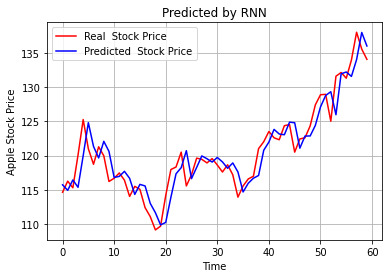

In [77]:
plt.plot(y_test, color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_priceRNN, color = 'blue', label = 'Predicted  Stock Price')
plt.title('Predicted by RNN')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [78]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in range(len(predicted_stock_priceRNN)):
	print('predicted=%f, expected=%f' % (predicted_stock_priceRNN[i], y_test[i]))
rmseRNN = sqrt(mean_squared_error(y_test, predicted_stock_priceRNN))
print('Test RMSE: %.3f' % rmseRNN)

predicted=115.716728, expected=114.620000
predicted=114.906357, expected=116.250000
predicted=116.427063, expected=115.280000
predicted=115.349251, expected=120.060000
predicted=119.977966, expected=125.270000
predicted=124.814949, expected=121.000000
predicted=121.343407, expected=118.720000
predicted=119.648781, expected=121.280000
predicted=122.078300, expected=119.960000
predicted=120.605797, expected=116.200000
predicted=116.795464, expected=116.670000
predicted=116.946617, expected=117.450000
predicted=117.685394, expected=116.390000
predicted=116.664734, expected=114.010000
predicted=114.307922, expected=115.490000
predicted=115.775749, expected=115.050000
predicted=115.547020, expected=112.370000
predicted=112.998016, expected=111.060000
predicted=111.628365, expected=109.110000
predicted=109.849312, expected=109.660000
predicted=110.204391, expected=114.140000
predicted=113.870880, expected=117.950000
predicted=117.327225, expected=118.320000
predicted=118.224495, expected=120

#Part5-Building and Training the ANN

In [79]:
X_train_ANN=X_train.reshape((X_train.shape[0],X_train.shape[1]))
X_test_ANN=X_test.reshape((X_test.shape[0],X_test.shape[1]))

In [80]:
regressorANN=Sequential()
regressorANN.add(Dense(units = 100,activation='relu' , input_dim=windows_size))
regressorANN.add(Dense(units = 100,activation='relu' ))
regressorANN.add(Dense(units = 150,activation='tanh' ))
regressorANN.add(Dense(units = 150,activation='tanh' ))
# regressorANN.add(Dense(units = 200,activation='tanh' ))
# regressorANN.add(Dense(units = 200,activation='tanh' ))
# regressorANN.add(Dense(units = 150,activation='tanh' ))
# regressorANN.add(Dense(units = 100,activation='tanh' ))
# regressorANN.add(Dense(units = 50,activation='tanh' ))
regressorANN.add(Dense(units = 1,activation='selu' ))

In [81]:
regressorANN.compile(optimizer='adam',loss='mean_squared_error') #regression = mean sqared error 

In [82]:
regressorANN.fit(X_train_ANN,y_train,epochs=100,batch_size=32,callbacks=[callback])

Epoch 1/100
77/77 [==============================] - 1s 4ms/step - loss: 695.3624
Epoch 2/100
77/77 [==============================] - 0s 4ms/step - loss: 452.3918
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 301.1049
Epoch 4/100
77/77 [==============================] - 0s 4ms/step - loss: 223.4902
Epoch 5/100
77/77 [==============================] - 0s 4ms/step - loss: 157.8100
Epoch 6/100
77/77 [==============================] - 0s 4ms/step - loss: 126.9785
Epoch 7/100
77/77 [==============================] - 0s 4ms/step - loss: 103.4064
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 84.3691
Epoch 9/100
77/77 [==============================] - 0s 4ms/step - loss: 69.6667
Epoch 10/100
77/77 [==============================] - 0s 4ms/step - loss: 60.6653
Epoch 11/100
77/77 [==============================] - 0s 4ms/step - loss: 50.8339
Epoch 12/100
77/77 [==============================] - 0s 4ms/step - loss: 43.8670
Epoch 13/100
77/77

In [83]:
predicted_stock_priceANN = regressorANN.predict(X_test_ANN)
# predicted_stock_priceANN = sc.inverse_transform(predicted_stock_priceANN)

2/2 [==============================] - 0s 9ms/step


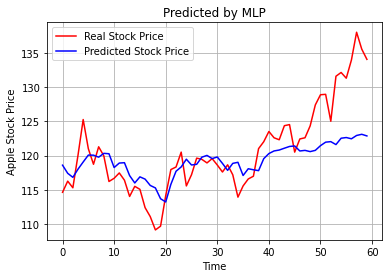

In [84]:

plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_priceANN, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predicted by MLP')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in range(len(predicted_stock_priceANN)):
	print('predicted=%f, expected=%f' % (predicted_stock_priceANN[i], y_test[i]))
rmseANN= sqrt(mean_squared_error(y_test, predicted_stock_priceANN))
print('Test RMSE: %.3f' % rmseANN)

predicted=118.589127, expected=114.620000
predicted=117.398346, expected=116.250000
predicted=116.808380, expected=115.280000
predicted=118.007957, expected=120.060000
predicted=119.053833, expected=125.270000
predicted=120.066040, expected=121.000000
predicted=120.052269, expected=118.720000
predicted=119.757439, expected=121.280000
predicted=120.319771, expected=119.960000
predicted=120.262253, expected=116.200000
predicted=118.244621, expected=116.670000
predicted=118.899010, expected=117.450000
predicted=118.949371, expected=116.390000
predicted=117.064606, expected=114.010000
predicted=115.985428, expected=115.490000
predicted=116.878166, expected=115.050000
predicted=116.546776, expected=112.370000
predicted=115.621109, expected=111.060000
predicted=115.258865, expected=109.110000
predicted=113.675240, expected=109.660000
predicted=113.204170, expected=114.140000
predicted=115.786301, expected=117.950000
predicted=117.698387, expected=118.320000
predicted=118.334396, expected=120

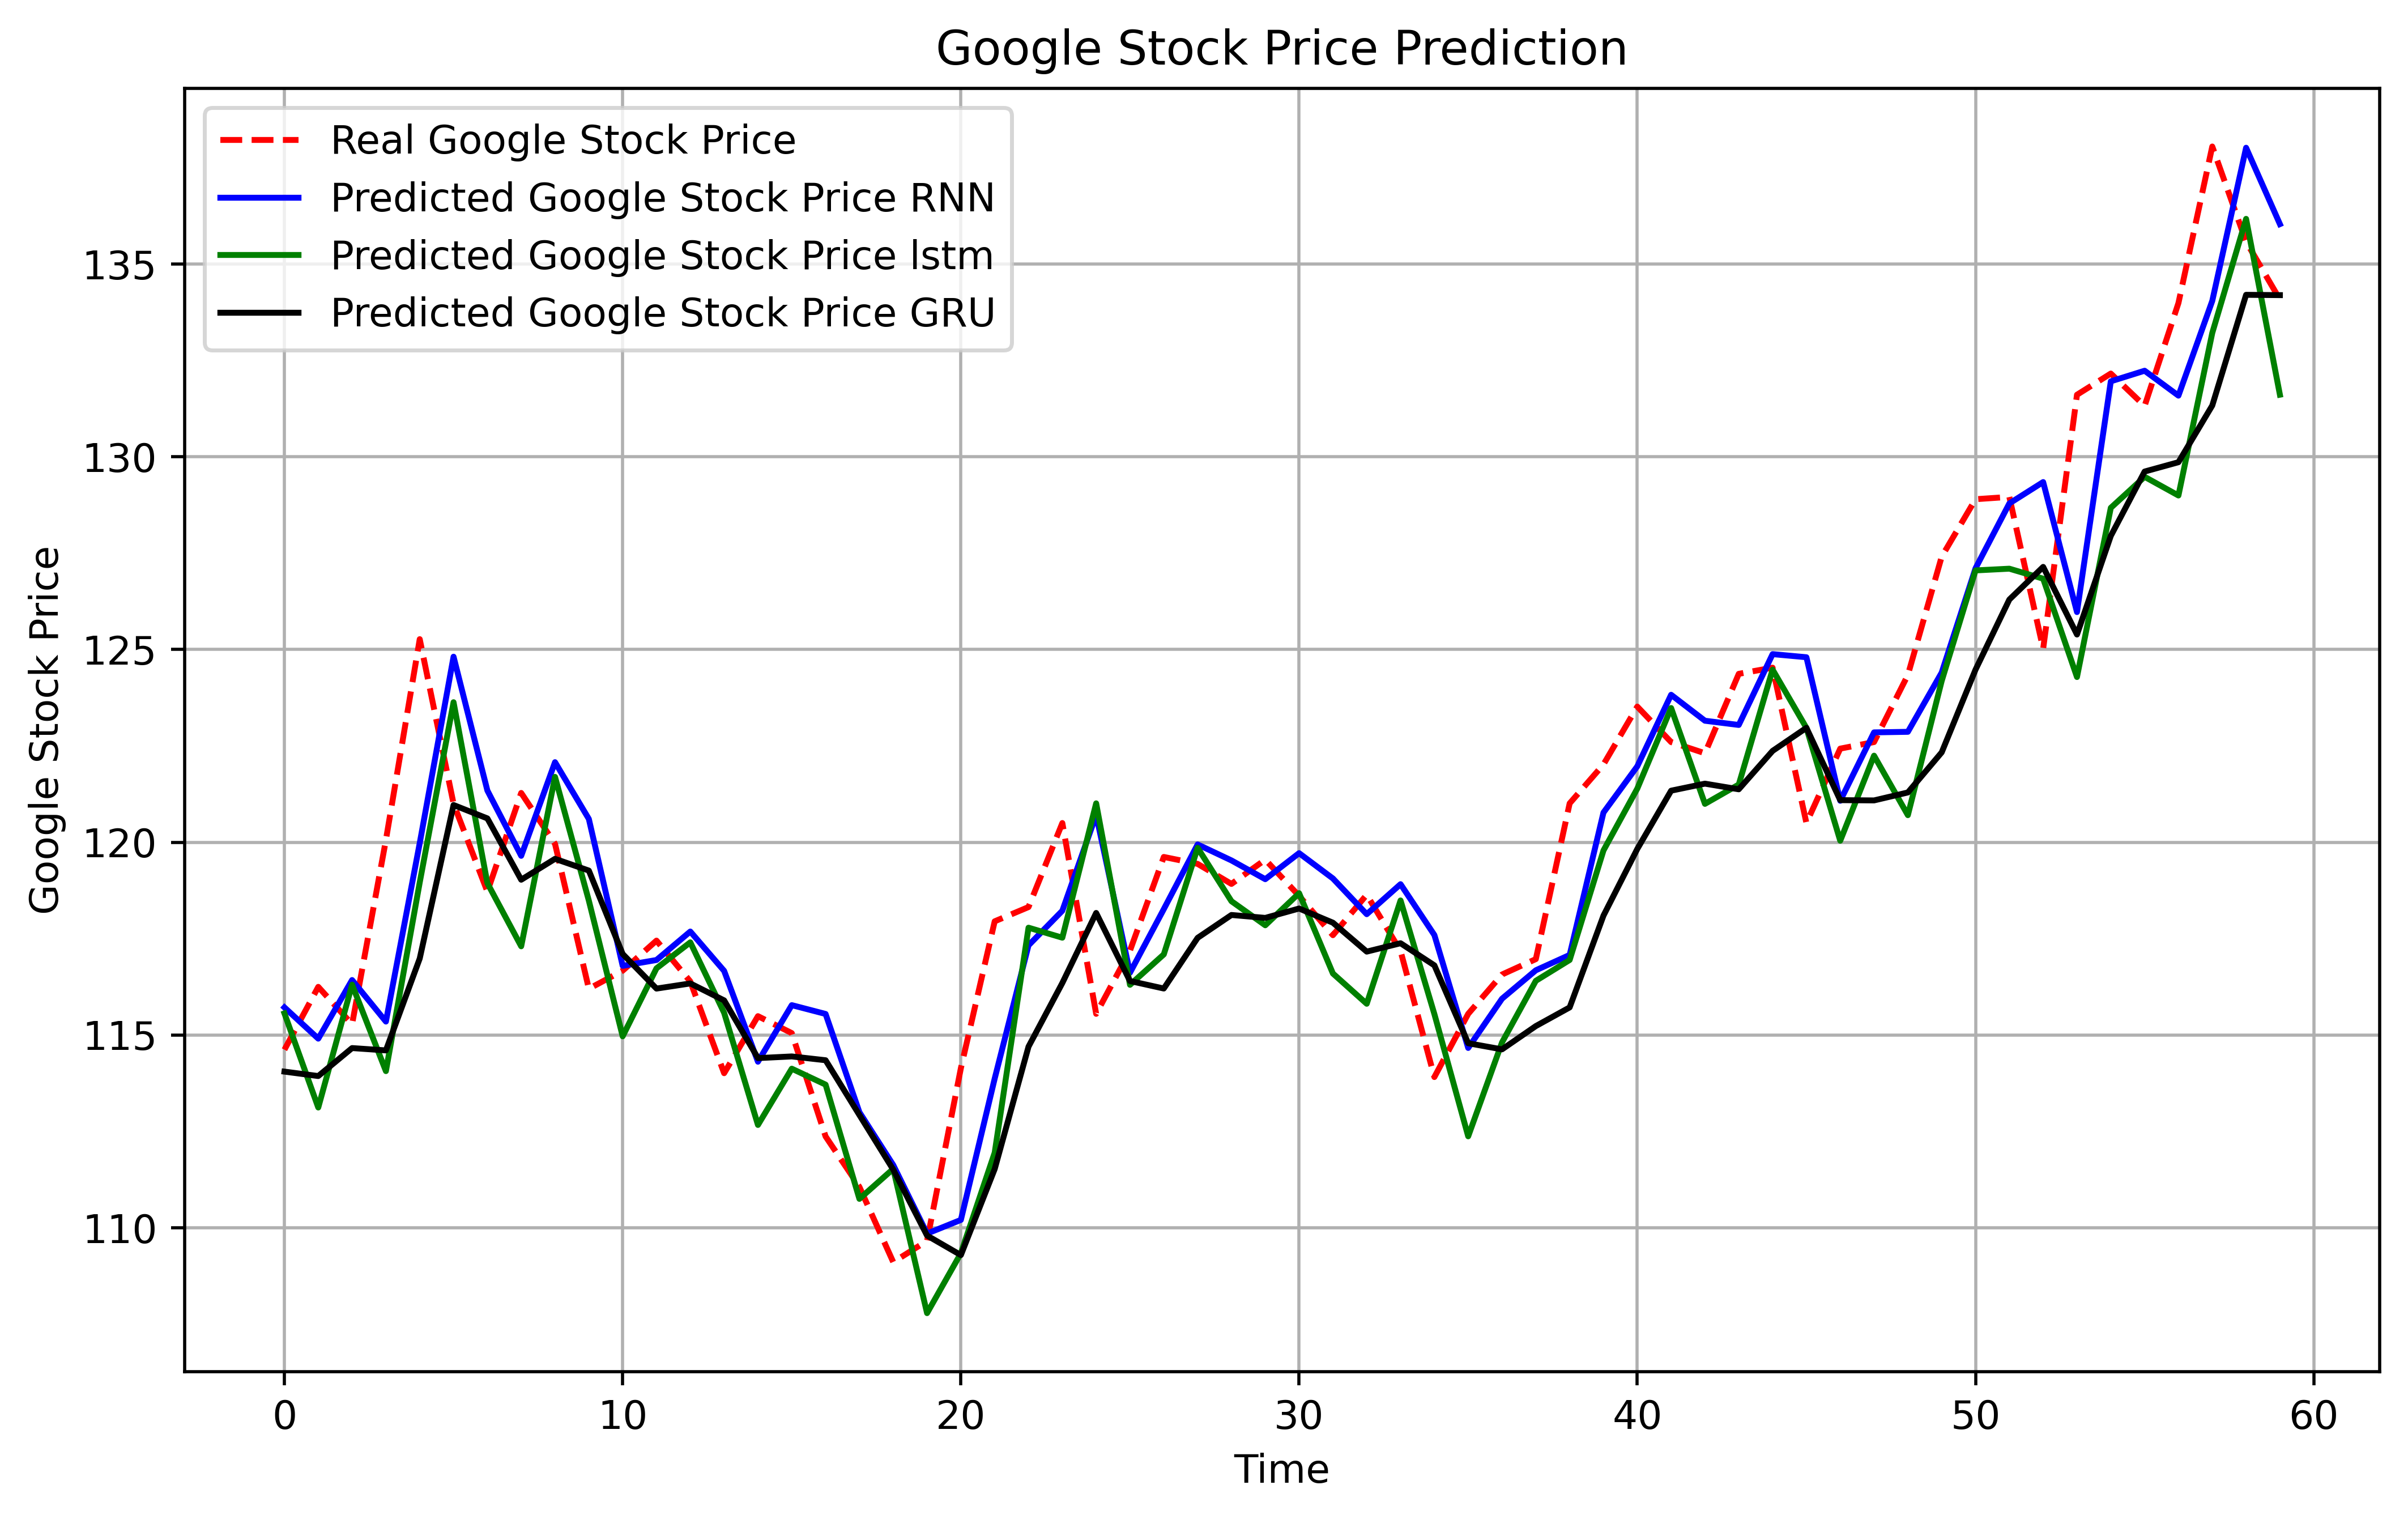

In [134]:
plt.figure(figsize=(10,6), dpi=500, facecolor='w', edgecolor='k')
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price',linestyle='dashed')
plt.plot(predicted_stock_priceRNN, color = 'blue', label = 'Predicted Google Stock Price RNN')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price lstm')
plt.plot(predicted_stock_priceGRU, color = 'black', label = 'Predicted Google Stock Price GRU')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.grid(True)
plt.legend()
plt.show()

#part6-Data Preprocessing for Stat Models

In [87]:
dataset1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/proje payani/HistoricalQuotes.xlsx' )



In [88]:
dataset1.set_index('Date')

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-12-31,132.6900,99116590,134.0800,134.7400,131.7200
2020-12-30,133.7200,96452120,135.5800,135.9900,133.4000
2020-12-29,134.8700,121047300,138.0500,138.7890,134.3409
2020-12-28,136.6900,124486200,133.9900,137.3400,133.5100
2020-12-24,131.9700,54930060,131.3200,133.4600,131.1000
...,...,...,...,...,...
2011-01-07,12.0043,309486396,11.9282,12.0125,11.8536
2011-01-06,11.9189,299831440,11.9543,11.9732,11.8893
2011-01-05,11.9286,253240859,11.7696,11.9407,11.7679


In [89]:
#reverse data
def reset_my_index(df):
  res = df[::-1].reset_index(drop=True)
  return(res)


In [90]:
dataset1=reset_my_index(dataset1)
dataset1=dataset1.iloc[:,3]
dataset1.shape
dataset1


0        11.6300
1        11.8729
2        11.7696
3        11.9543
4        11.9282
          ...   
2512    131.3200
2513    133.9900
2514    138.0500
2515    135.5800
2516    134.0800
Name:  Open, Length: 2517, dtype: float64

In [91]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Split Data to Train and Test

In [92]:
training_set2=dataset1.iloc[:-60]
test_set2=dataset1.iloc[len(training_set2):]
print(training_set2.shape)
print(test_set2.shape)

(2457,)
(60,)


In [93]:
training_set2=pd.DataFrame(training_set2)

###Stationary Test

####Use dicky fuller test

In [94]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")   

for name, column in training_set2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n') 
   #chon non_stationary hast pas payad yek martabe tafazolgiri anjam dahim hengam ijad model

    Augmented Dickey-Fuller Test on " Open" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 2.9921
 No. Lags Chosen       = 26
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 1.0. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [95]:
# we can use also pmdarima library
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha=0.5)
adf_test.should_diff(training_set2)

(0.99, True)

###ِDifferencing

In [96]:
diff_training_set2=training_set2.values


In [97]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [98]:
diff_training_set2=difference(diff_training_set2,1)
diff_training_set2=pd.DataFrame(diff_training_set2)

print(diff_training_set2)

           0
0     0.2429
1    -0.1033
2     0.1847
3    -0.0261
4     0.1729
...      ...
2451 -0.7600
2452  3.8500
2453 -4.7500
2454  1.0200
2455  1.7900

[2456 rows x 1 columns]


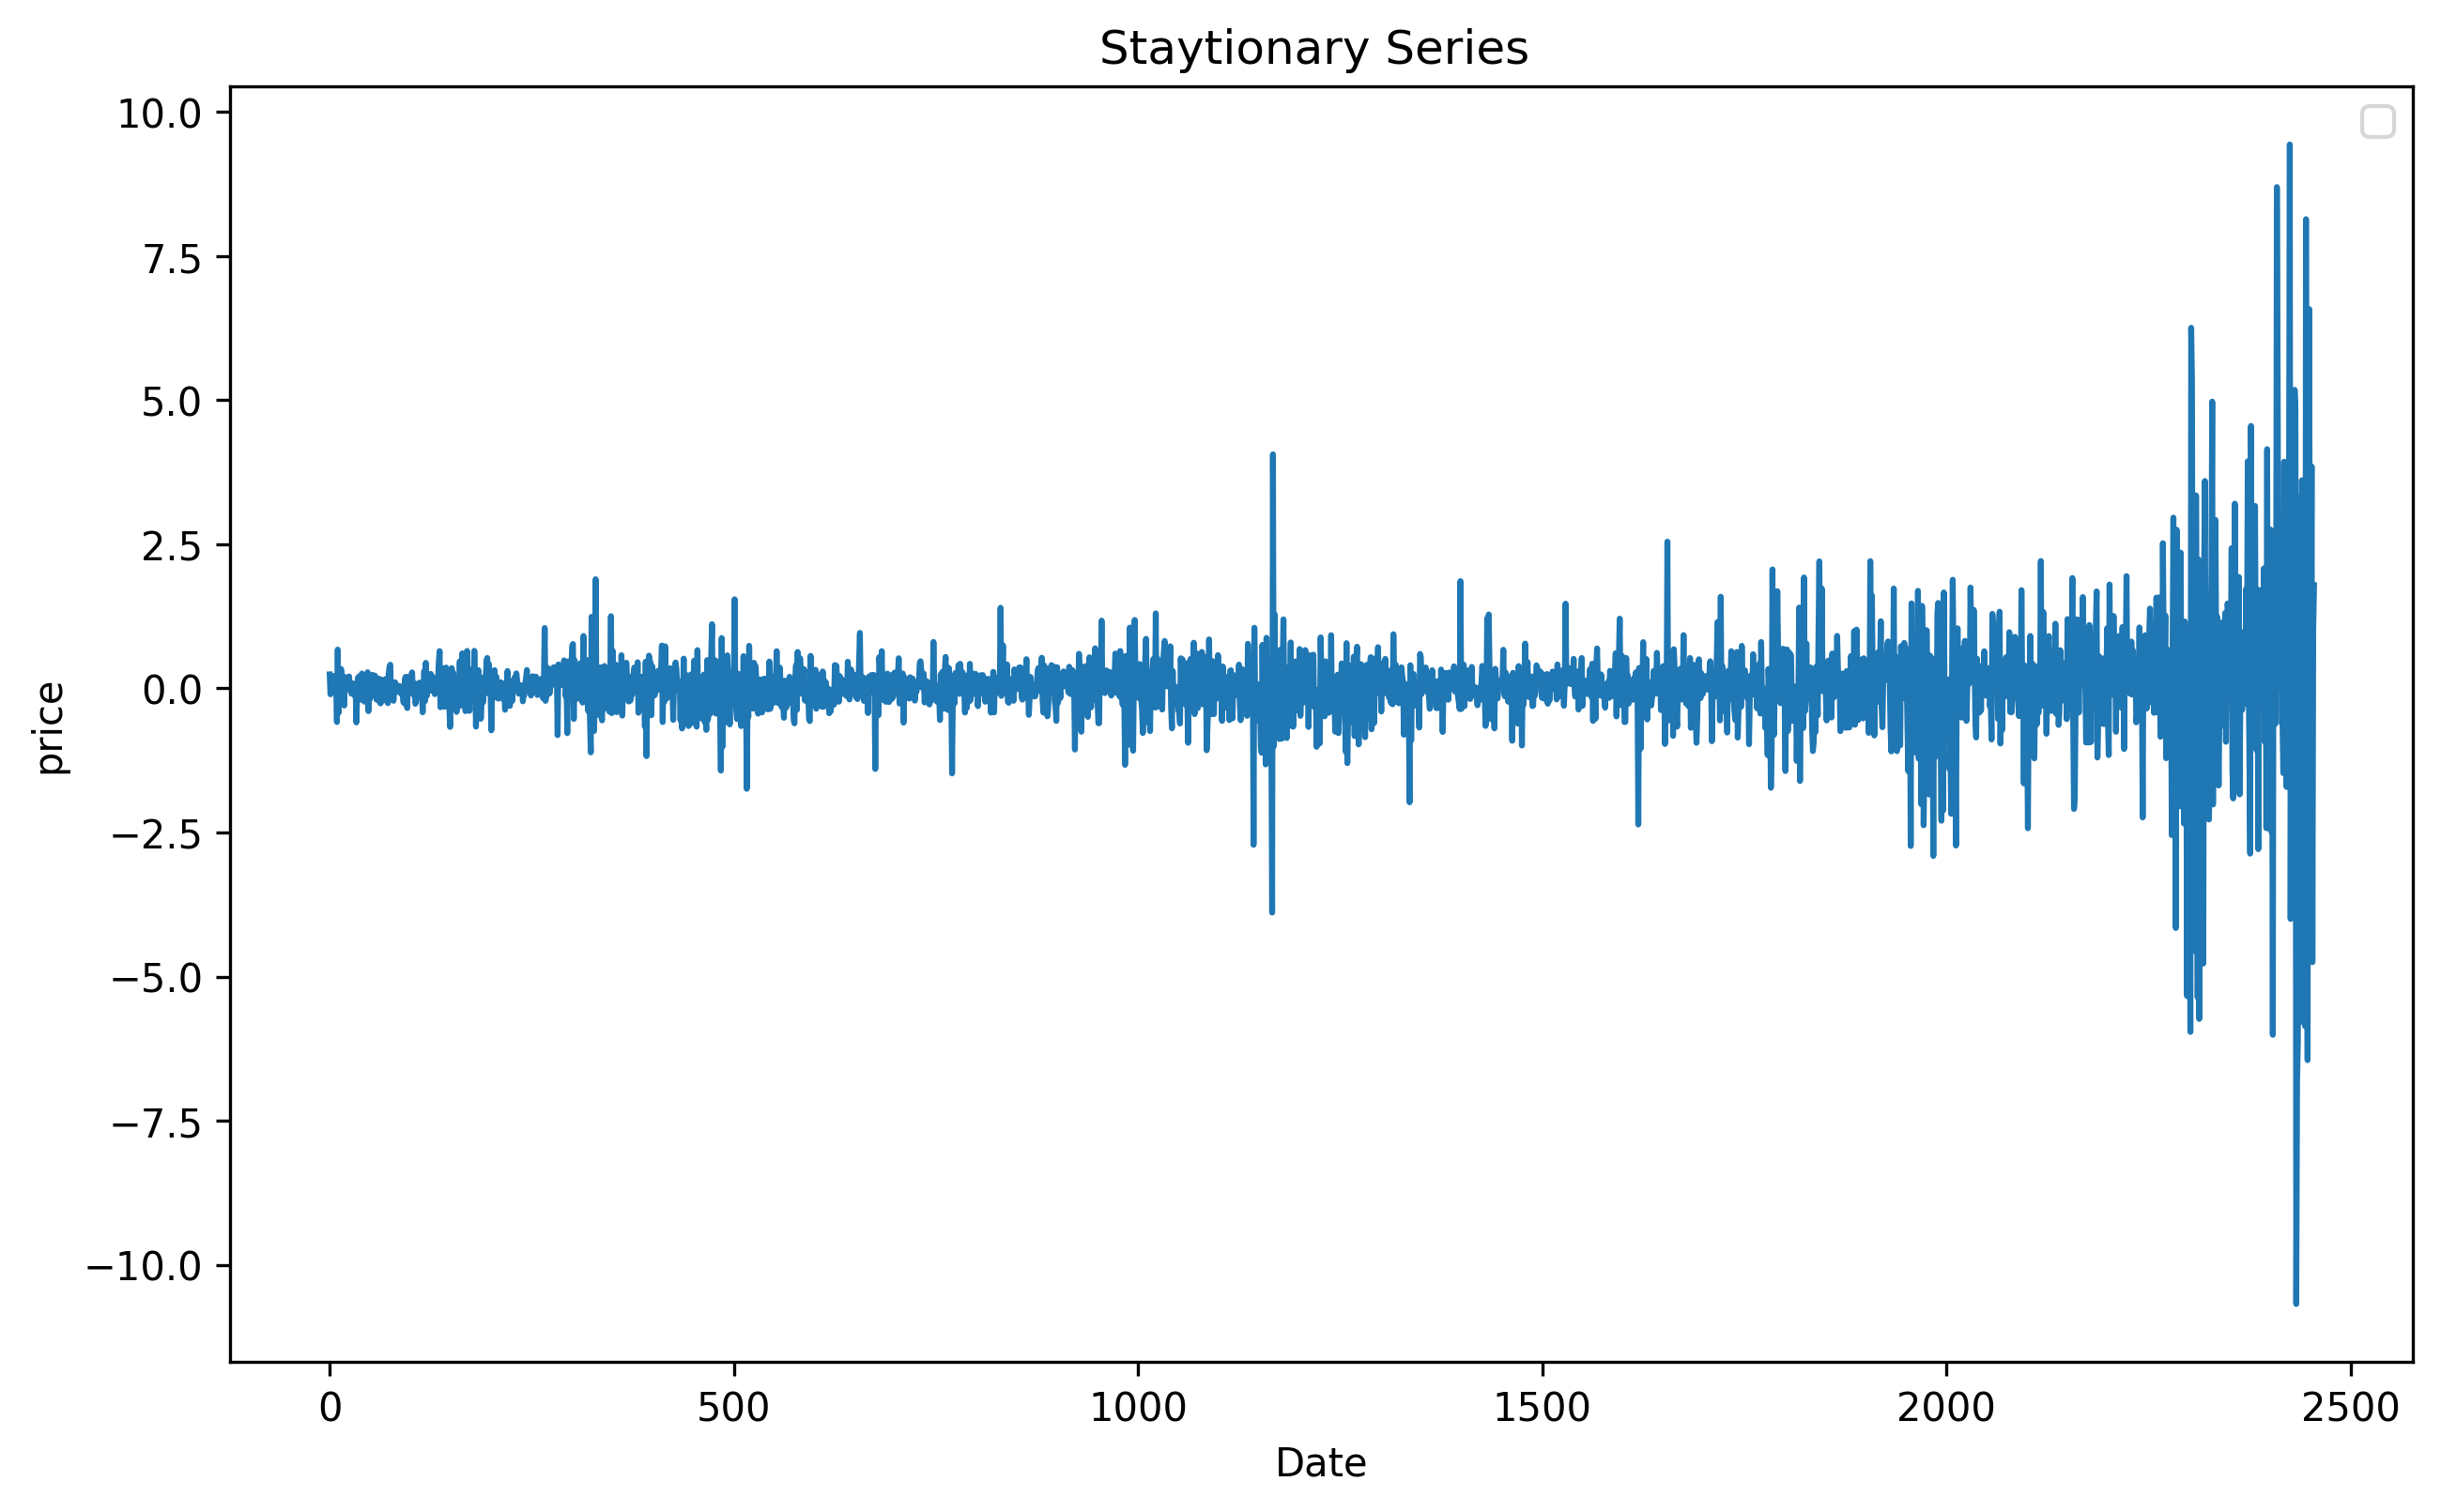

In [99]:
plt.figure(figsize=(10,6), dpi=300, facecolor='w', edgecolor='k')
plt.xlabel('Date')
plt.ylabel('price')
plt.title('Staytionary Series ')
plt.legend()
plt.plot(diff_training_set2)

In [100]:
for name, column in diff_training_set2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n') 

    Augmented Dickey-Fuller Test on "0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7965
 No. Lags Chosen       = 25
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




####Use ACF and PACF Plot

.

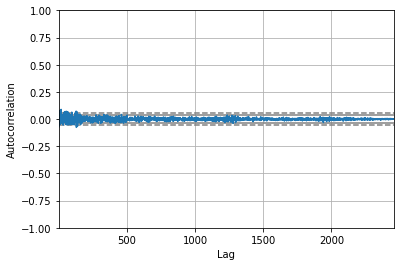

In [101]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(diff_training_set2)  ## ham pandas daraye in nemoodare ham ketabkhaneye statsmodel
##hamantor ke moshahede mikonid non staionary hast

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


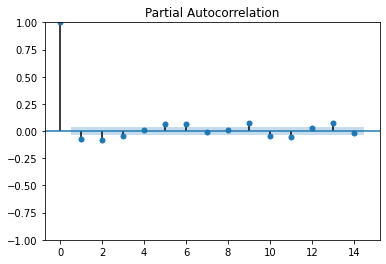

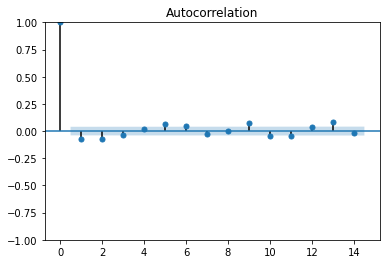

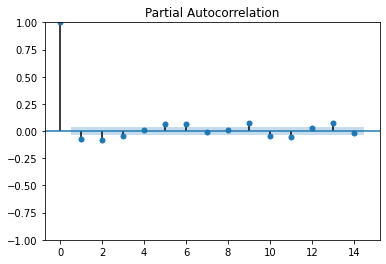

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(diff_training_set2,lags=14)
plot_pacf(diff_training_set2,lags=14)
#autocorrelation va partialautocorrelation ya nazdik sefr hastan ya be soorat namaee be ser nazdik mishavand ke bayangar ista boodan model ast

#Part7-Building and Training the ARIMA





In [103]:
# from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA

In [104]:
training_set2=np.array(training_set2)
test_set2=np.array(test_set2)

###choose Optimal model by AutoArima 
####Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. We use statistical techniques to generate these values by performing the difference to eliminate the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.


In [105]:
from pmdarima.arima import auto_arima

In [106]:
arima_moadel=auto_arima(training_set2,start_p=0,start_q=0,max_p=5,max_d=2,max_q=5)
arima_moadel.fit(training_set2)
arima_moadel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2457
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -3452.295
Date:                Wed, 16 Nov 2022   AIC                           6916.590
Time:                        12:59:19   BIC                           6951.426
Sample:                             0   HQIC                          6929.249
                               - 2457                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9321      0.005   -181.359      0.000      -0.942      -0.922
ar.L2         -0.8328      0.008   -109.558      0.000      -0.848      -0.818
ar.L3         -0.6766      0.008    -80.042      0.000      -0.693      -0.660
ar.L4         -0.4655      0.008    -59.825      0.000      -0.481      -0.450
ar.L5         -0.2160      0.007    -31.499      0.000      -0.229      -0.203
sigma2         0.9743      0.007    136.966      0.000       0.960       0.988
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):             95470.96
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):              20.53   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
len(training_set2)+len(test_set2)-len(training_set2)

60

In [108]:
# predict=arima_moadel.predict(start=len(training_set2),end=len(training_set2)+len(test_set2))
predictedARIMA, confint =arima_moadel.predict(n_periods=len(test_set2), return_conf_int=True)

predictedARIMA

array([115.70402265, 115.83571879, 115.98586673, 115.61632516,
       116.29458548, 116.74280719, 116.84824138, 116.99379728,
       117.16751002, 117.39430417, 117.73028745, 117.95658861,
       118.13649789, 118.34632753, 118.57881894, 118.82413932,
       119.06366893, 119.27866831, 119.49566301, 119.72427913,
       119.95692353, 120.18745505, 120.4131067 , 120.63649977,
       120.86310661, 121.09201436, 121.32035715, 121.54724118,
       121.77339024, 122.00005628, 122.22760566, 122.45519953,
       122.68232367, 122.90916897, 123.1361124 , 123.36330293,
       123.59057915, 123.81773456, 124.04477856, 124.27183281,
       124.49895878, 124.72612248, 124.9532623 , 125.18036372,
       125.40745969, 125.63457582, 125.86170665, 126.08883371,
       126.31594924, 126.5430605 , 126.7701767 , 126.99729823,
       127.22441975, 127.45153797, 127.67865429, 127.90577159,
       128.13289064, 128.36001007, 128.58712862, 128.81424645])

In [109]:
len(predictedARIMA)

60

(60,)


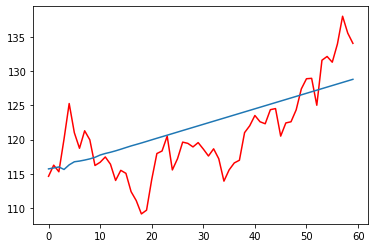

In [110]:
plt.plot(test_set2,c='red')
plt.plot(predictedARIMA)
print(predictedARIMA.shape)

In [111]:
# history = [x for x in training_set2]

# predictedARIMA= list()
# for t in range(len(test_set2)): #be ezaye har nemooneye test
#    model = ARIMA(history, order=(5,2,0))# p=14 ,d=1(tafazolgiri 1 martabe), q=14
#    model_fit = model.fit()
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictedARIMA.append(yhat)
#    obs = test_set2[t]
#    history.append(obs)

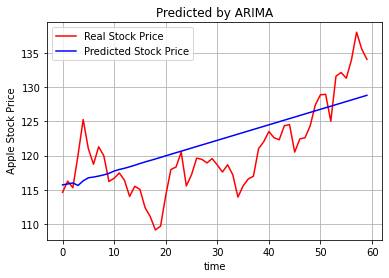

In [112]:
plt.plot(test_set2, color = 'red', label = 'Real Stock Price')
plt.plot(predictedARIMA, color = 'blue', label = 'Predicted Stock Price')
plt.title('Predicted by ARIMA')
plt.xlabel('time')
plt.ylabel(' Apple Stock Price')
plt.legend()
plt.grid()
plt.show()

In [113]:
from math import sqrt
from sklearn.metrics import mean_squared_error
for i in range(len(predictedARIMA)):
	print('predicted=%f, expected=%f' % (predictedARIMA[i], test_set2[i]))
rmseARIMA= sqrt(mean_squared_error(test_set2, predictedARIMA))
print('Test RMSE: %.3f' % rmseARIMA)

predicted=115.704023, expected=114.620000
predicted=115.835719, expected=116.250000
predicted=115.985867, expected=115.280000
predicted=115.616325, expected=120.060000
predicted=116.294585, expected=125.270000
predicted=116.742807, expected=121.000000
predicted=116.848241, expected=118.720000
predicted=116.993797, expected=121.280000
predicted=117.167510, expected=119.960000
predicted=117.394304, expected=116.200000
predicted=117.730287, expected=116.670000
predicted=117.956589, expected=117.450000
predicted=118.136498, expected=116.390000
predicted=118.346328, expected=114.010000
predicted=118.578819, expected=115.490000
predicted=118.824139, expected=115.050000
predicted=119.063669, expected=112.370000
predicted=119.278668, expected=111.060000
predicted=119.495663, expected=109.110000
predicted=119.724279, expected=109.660000
predicted=119.956924, expected=114.140000
predicted=120.187455, expected=117.950000
predicted=120.413107, expected=118.320000
predicted=120.636500, expected=120

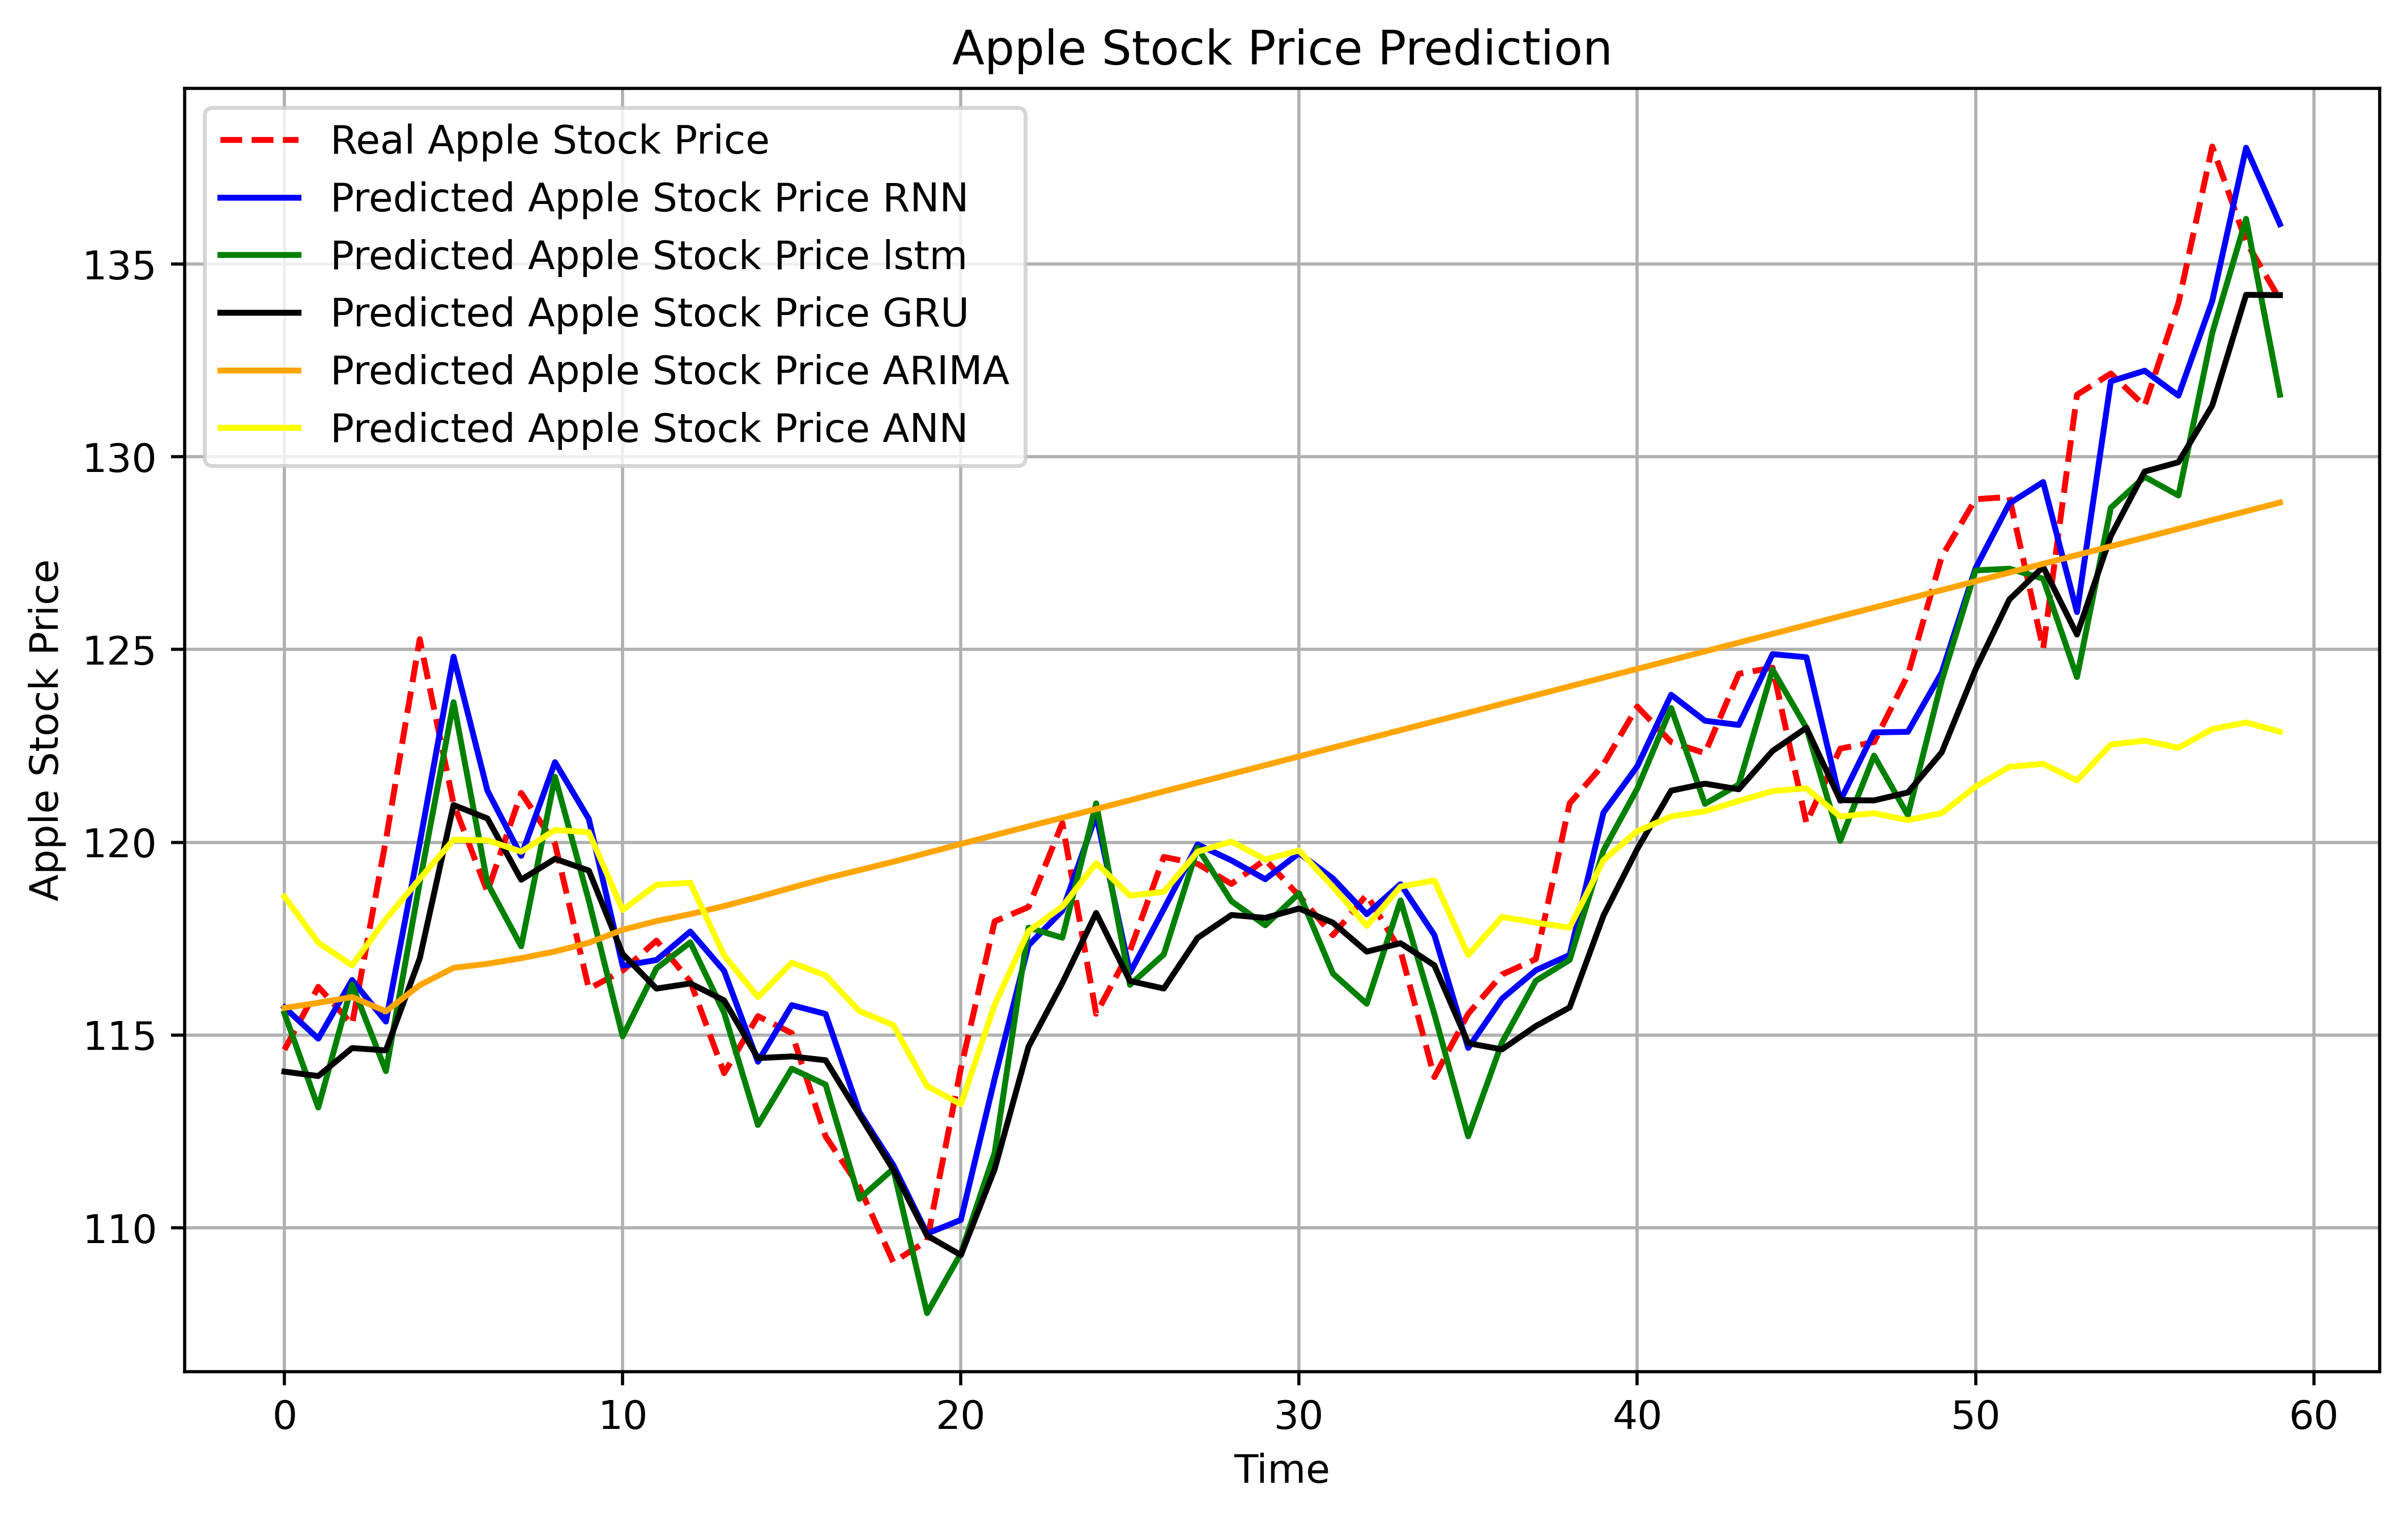

In [135]:
plt.figure(figsize=(10,6), dpi=500, facecolor='w', edgecolor='k')
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price',linestyle='dashed')
plt.plot(predicted_stock_priceRNN, color = 'blue', label = 'Predicted Apple Stock Price RNN')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Apple Stock Price lstm')
plt.plot(predicted_stock_priceGRU, color = 'black', label = 'Predicted Apple Stock Price GRU')
plt.plot(predictedARIMA, color = 'orange', label = 'Predicted Apple Stock Price ARIMA')
plt.plot(predicted_stock_priceANN, color = 'yellow', label = 'Predicted Apple Stock Price ANN')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [136]:
dic2={"MLP"      :("{:.4f}".format(rmseANN)),
      "SimpleRNN":("{:.4f}".format(rmseRNN)),
      "GRU"      :("{:.4f}".format(rmseGRU)),
      "LSTM"     :("{:.4f}".format(rmseLSTM)),
      "ARIMA"    :("{:.4f}".format(rmseARIMA))}

In [137]:
evaluation_test_loss = pd.DataFrame.from_dict(dic2,orient='index', columns=["RMSE Score"] )
evaluation_test_loss

,RMSE Score
MLP,4.8519
SimpleRNN,2.4646
GRU,3.0401
LSTM,2.8500
ARIMA,4.6665


Text(0.5, 1.0, 'RMSE Score')

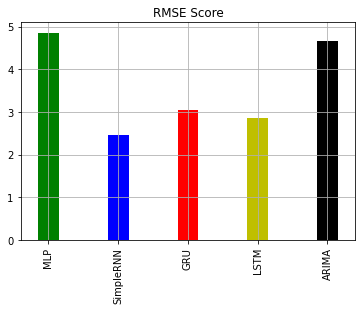

In [138]:
from matplotlib.pyplot import plot
evaluation_test_loss["RMSE Scoer"] = evaluation_test_loss["RMSE Score"].astype(float)
evaluation_test_loss["RMSE Scoer"].plot(kind="bar", grid=True , color=tuple(["g", "b", "r", "y", "k"]), width=0.3)
plt.title("RMSE Score")

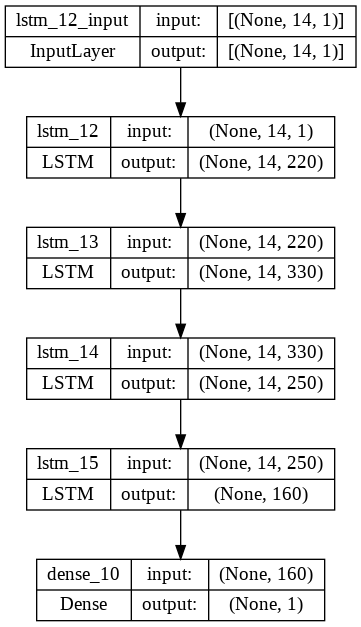

In [139]:
plot_model(regressor, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

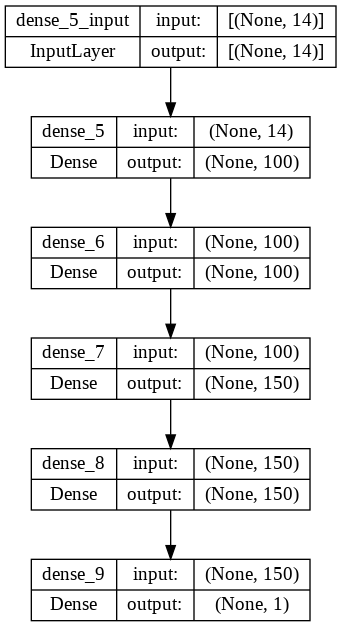

In [140]:
plot_model(regressorANN, to_file='model_plot.png', show_shapes=True, show_layer_names=True)